In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('energy_anlagen/ElectricityProductionPlant.csv')

In [3]:
df = df[(df.SubCategory=='subcat_2')|(df.SubCategory=='subcat_3')]

In [4]:
df

,xtf_id,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,_x,_y
0,14727,Schlossstrasse 15,4147,Aesch BL,BL,2009-05-05,14.65,18.81,maincat_2,subcat_2,plantcat_9,NaN,NaN
1,14728,Ob der Steig 1,5082,Kaisten,AG,2011-10-28,5.80,5.80,maincat_2,subcat_2,plantcat_8,2645765.0,1265097.0
2,10164,Gässli 4,3114,Wichtrach,BE,2008-10-07,3.00,3.00,maincat_2,subcat_2,plantcat_8,2610547.0,1188978.0
3,10794,Diemtigtalstrasse 46,3753,Oey,BE,2008-06-27,8.40,8.40,maincat_2,subcat_2,plantcat_8,2610530.0,1167346.0
4,9476,Holzweidstrasse 8,8340,Hinwil,ZH,2006-04-21,4.80,4.80,maincat_2,subcat_2,plantcat_8,2705859.0,1240558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143463,48373,Frümselweg 3,8400,Winterthur,ZH,1992-05-10,1.70,1.70,maincat_2,subcat_2,NaN,2696331.0,1263236.0
143464,50526,Kalchrainstrasse 12,6315,Oberägeri,ZG,1996-04-04,3.00,3.00,maincat_2,subcat_2,NaN,2689645.0,1221007.0
143465,50527,Bahnhofstrasse 18,6300,Zug,ZG,2001-07-04,3.00,3.00,maincat_2,subcat_2,NaN,2681678.0,1224818.0
143466,51006,Zugimattstrasse 7,3638,Blumenstein,BE,2004-07-21,1.00,1.00,maincat_2,subcat_2,NaN,2606413.0,1176995.0


In [5]:
gdf = gpd.read_file('SHAPEFILE_LV95_LN02/swissBOUNDARIES3D_1_3_TLM_HOHEITSGEBIET.shp')

<AxesSubplot:>

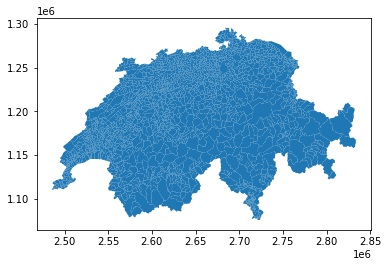

In [6]:
gdf.plot()

In [7]:
plants = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df._x, df._y))

In [8]:
plants.crs = gdf.crs

In [9]:
plants = plants[plants['_x'].notna()]

In [10]:
join_left_df = plants.sjoin(gdf, how="left")

In [11]:
gb = pd.DataFrame(join_left_df.groupby(['NAME','BFS_NUMMER'])['TotalPower'].sum()).reset_index()

In [12]:
gb

,NAME,BFS_NUMMER,TotalPower
0,Aadorf,4551,5182.39
1,Aarau,4001,3865.27
2,Aarberg,301,2160.94
3,Aarburg,4271,1393.74
4,Aarwangen,321,2129.26
...,...,...,...
2121,Zweisimmen,794,1919.72
2122,Zwieselberg,947,149.77
2123,Zwingen,2793,950.43
2124,Zäziwil,628,928.15


In [13]:
pop = gdf[['BFS_NUMMER','EINWOHNERZ']]

In [14]:
gb = gb.merge(pop,left_on='BFS_NUMMER',right_on='BFS_NUMMER')

In [15]:
gb['kW_cap'] = gb['TotalPower']/gb['EINWOHNERZ']

In [16]:
gb

,NAME,BFS_NUMMER,TotalPower,EINWOHNERZ,kW_cap
0,Aadorf,4551,5182.39,9216.0,0.562325
1,Aarau,4001,3865.27,21726.0,0.177910
2,Aarberg,301,2160.94,4626.0,0.467129
3,Aarburg,4271,1393.74,8577.0,0.162497
4,Aarwangen,321,2129.26,4638.0,0.459090
...,...,...,...,...,...
2215,Zweisimmen,794,1919.72,3032.0,0.633153
2216,Zwieselberg,947,149.77,322.0,0.465124
2217,Zwingen,2793,950.43,2514.0,0.378055
2218,Zäziwil,628,928.15,1601.0,0.579731


In [17]:
gdf_gb = gdf.merge(gb,left_on='BFS_NUMMER',right_on='BFS_NUMMER')

In [18]:
gdf_gb = gdf_gb[['geometry','kW_cap']]

In [19]:
gdf_gb = gdf_gb[gdf_gb.kW_cap>0.5]

In [20]:
gdf_gb

,geometry,kW_cap
15,"POLYGON Z ((2814883.503 1167278.080 2496.652, ...",0.890569
21,"POLYGON Z ((2717193.462 1165665.512 3168.678, ...",0.538357
26,"POLYGON Z ((2675336.163 1164473.190 3515.700, ...",14.356743
29,"POLYGON Z ((2748312.761 1180826.364 1989.110, ...",0.620416
31,"POLYGON Z ((2827800.170 1186229.620 2851.363, ...",0.710690
...,...,...
2408,"POLYGON Z ((2673331.465 1221173.284 404.467, 2...",1.058647
2419,"POLYGON Z ((2578194.409 1176919.759 749.333, 2...",0.629326
2420,"POLYGON Z ((2524166.468 1154745.045 503.189, 2...",3.303333
2422,"POLYGON Z ((2711231.769 1114959.652 197.505, 2...",0.826707


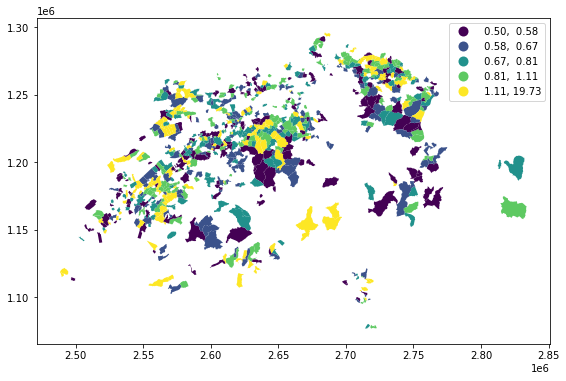

In [21]:
fig, ax = plt.subplots(figsize=(14, 6))
gdf_gb.plot(column='kW_cap',scheme='quantiles',legend=True,ax=ax)
plt.savefig('Karte_Wind_Solar_Dichte_kW_pro_Kopf.pdf')
plt.savefig('Karte_Wind_Solar_Dichte_kW_pro_Kopf.png',dpi=1000) 
gdf_gb.to_file("shp/Karte_Wind_Solar_Dichte_kW_pro_Kopf.shp")